In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#face_cascade = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('C:\opencv\build\etc\haarcascades\haarcascade_eye.xml')

In [3]:
img = cv2.imread('james.jpg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

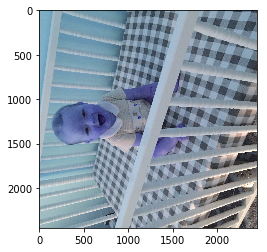

In [5]:
plt.imshow(img)

In [6]:
#faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [7]:
'''
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
cv2.imshow('img', img)
cv2.waitKey(0)
'''

"\nfor (x,y,w,h) in faces:\n    img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)\n    roi_gray = gray[y:y+h, x:x+w]\n    roi_color = img[y:y+h, x:x+w]\n    eyes = eye_cascade.detectMultiScale(roi_gray)\n    for (ex,ey,ew,eh) in eyes:\n        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh),(0,255,0),2)\n        \ncv2.imshow('img', img)\ncv2.waitKey(0)\n"

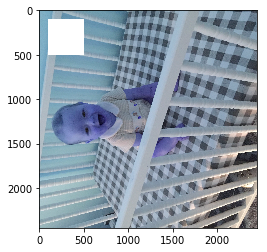

In [26]:
img2 = img.copy()
img2[100:500,100:500] = [255,255,255]
plt.imshow(img2)

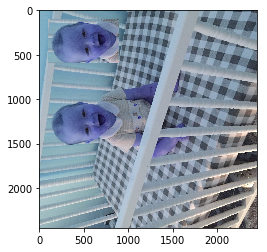

In [32]:
img2 = img.copy()
face = img2[1000:1500,100:900]
img2[100:600,100:900] = face
plt.imshow(img2)

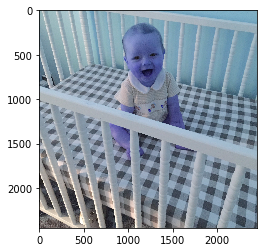

In [40]:
rows, cols = img.shape[0], img.shape[1]
M = cv2.getRotationMatrix2D((cols/2,rows/2),270,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

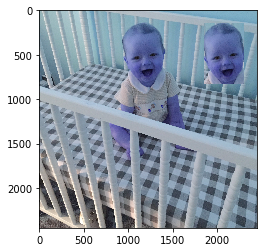

In [45]:
img2 = dst.copy()
face = img2[150:830,950:1400]
img2[150:830,1850:2300] = face
plt.imshow(img2)